# C. Elegans

Import the libraries

In [8]:
import sys
sys.path.append('../../src')

import Driver
import Geometry
import Scaffold

import math
import numpy as np
from random import random
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt

sys.path.append('../')
import Holes as ho

Read the data

In [ ]:
# READ THE DATASET
G = nx.read_weighted_edgelist('./celegans_weighted_undirected.edges')
# converto to weighted adj matrix
W = nx.adjacency_matrix(G,weight='weight').todense()
# weigts you need to invert
W = np.reciprocal(W) # will complain about division by zero
W[W==np.inf] = 0 # revert inf to zeros
G = nx.Graph(W) # rebuild the right graph

Set the correct number of nodes

In [24]:
NV = G.number_of_nodes()
print(NV)

297


### Holes
First the loose scaffold <br>
Compute it

In [ ]:
#COMPUTE THE UPAWARD FILTRATION
fil = ho.filtrations.upward_weight_clique_rank_filtration(G)
clique_dictionary_file = './celegans_filtration.pck'
pk.dump(fil,open(clique_dictionary_file,'wb'), protocol=2)

hom_dim = 1 # max homology group calculated
dataset_tag = 'celegans'
output_dir = './';

#COMPUTE THE PERSISTENT HOMOLOGY GENERATORS
ho.persistent_homology_calculation(clique_dictionary_file, hom_dim, dataset_tag, output_dir,m1=512, m2=2048,save_generators=True)

#RESULTS ARE STORED IN THIS FILE
gen_file = './gen/generators_celegans_.pck'
gen = pk.load(open(gen_file, 'rb'))

Build and dump the loose scaffold

In [14]:
ScafH = nx.Graph()
ScafH.add_nodes_from(G)

edges = []

for c in gen[1]:
    edges.extend(c.cycles())
    
for e in edges:
    u , v = int(e[0]) , int(e[1])
    if ScafH.has_edge(u,v):
        ScafH[u][v]['weight'] += 1
    else:
        ScafH.add_edge(u, v, weight=1)

#WRITE RESULTING SCAFFOLD TO FILE        
out_file = './Scaffolds/JPScaffold.pck'
pk.dump(ScafH, open(out_file,'wb'))

Preliminary scan of edge weights to define filtration steps...
Constructing filtration...
Max filtration value: 30
Clique dictionary created.
Calling: jython  ../../Holes/jython_utils/persistent_homology_calculation.py ./celegans_filtration.pck 1 ./ celegans_ /Users/marco/javaplex/ True
0


Child returned 0


Draw the output loose scaffold

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


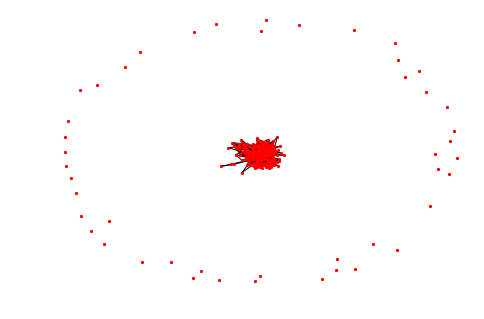

In [22]:
nx.draw(ScafH, node_size=5)

### Minimal Scaffold
This, on a desktop machine, is extremely computationally heavy. The progress can be visualized by printing the content of file `monitor` in a shell.

In [25]:
epsList = Geometry.genFullEpsList(W) # get the filtration

# Knowing in advance which subset of the filtration has nontrivial homology,
# one could slice it to avoid useless computations
pass

# set tracking output file
out_file = './monitor'

# now the heavy-lifting!
Filtr = Driver.getFiltrBasis(W, epsList, Draws=True, parallel=True,monitor='./monitor')

Process ForkPoolWorker-23:
Process ForkPoolWorker-28:
Process ForkPoolWorker-34:
Process ForkPoolWorker-38:
Process ForkPoolWorker-36:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2/Fra

KeyboardInterrupt: 

  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/local/Cellar/pyth

Dump the filtration to disk

In [17]:
# dump the filtration of SHB 
filtr_out = './gen/CEMinFiltr.pck'
pk.dump(Filtr, open(filtr_out,'wb'))

Compute the minimal scaffold

In [20]:
# From the filtration compute the scaffold
S = Scaffold.frequency_Scaffold(Filtr , NV)
Scaf = nx.from_numpy_matrix(S, parallel_edges=False)

out_file = './Scaffolds/MinScaffold.pck'
pk.dump(Scaf, open(out_file,'wb'))

Draw the output minimal scaffold

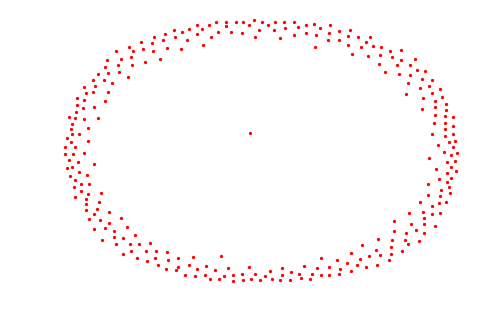

In [23]:
nx.draw(Scaf, node_size=5)